<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Tutorial_Funciones_Activacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Puede revisar el siguiente material

[Enlace](https://universidadsergioarboleda-my.sharepoint.com/:f:/g/personal/joaquin_sanchezc_usa_edu_co/EvD-PTlR2kZFnLTFkyvqOc4BniSw-L3DvPvmFF1svAK7Uw?e=9Wgpju)

# **¿Qué es una función de activación?**

Es una función que se aplica a las neuronas de una capa durante la predicción.

Una función de activación es una función que se aplica a las neuronas de una capa durante la predicción. Esto debería resultarte muy familiar, porque has estado utilizando una función de activación llamada relu (mostrada aquí en la red neuronal de tres capas). La función relu tenía el efecto de convertir todos los números negativos en 0.

Simplificando demasiado, una función de activación es cualquier función que puede tomar un número y devolver otro número. Pero hay un número infinito de funciones en el universo, y no todas son útiles como funciones de activación.

Hay varias restricciones sobre lo que hace que una función sea una función de activación. Usar funciones fuera de estas restricciones es normalmente una mala idea, como verás.

# Ejemplo de Funciones de Activación

* **Función de activación ReLU (Rectified Linear Unit):**
Esta es una de las funciones de activación más utilizadas en redes neuronales. Es una función lineal rectificada y se define como $f(x)=max(0,x)$. Es simple y eficiente en términos de cómputo y ha demostrado ser efectiva en la mayoría de las aplicaciones.

* **Función de activación Sigmoid:**
La función sigmoide tiene una forma de "S" y es continua y diferenciable. Se define como $f(x)=\frac{1}{1+e^{-x}}$
Produce valores en el rango de 0 a 1 y es útil en la salida de modelos de clasificación binaria donde se desea una probabilidad de pertenencia a una clase.

* **Función de activación Tangente Hiperbólica (Tanh):**
La función tangente hiperbólica es similar a la función sigmoide pero produce valores en el rango de -1 a 1. Se define como $f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$. Se utiliza a menudo en capas ocultas de redes neuronales.

* **Función de activación Softmax:**
La función softmax se utiliza comúnmente en la capa de salida de una red neuronal para problemas de clasificación multiclase. Transforma un vector de números reales en un vector de probabilidades que suman 1. Se define como: $f(x_{i})=\frac{e^{x_{i}}}{\sum{e^{x_{j}}}}$

* **Función de activación Leaky ReLU:** La función Leaky ReLU es similar a ReLU pero permite un pequeño gradiente cuando $x<0$ lo que puede ayudar a resolver el problema de "neuronas muertas" Se define como $f(x)=max(ax,x)$, donde $a$ es un valor pequeño positivo.


In [ ]:
import numpy as np

#Relu
def relu(x):
    return np.maximum(0, x)


#Función de activación Sigmoid:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Función de activación Tangente Hiperbólica (Tanh):
def tanh(x):
    return np.tanh(x)

#Función de activación Softmax:
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

#Función de activación Leaky ReLU:

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)



**Comparación entre funciones de activación**

En este ejemplo, utilizaremos un conjunto de datos de clasificación binaria y compararemos el rendimiento de las funciones de activación ReLU, Sigmoid y Tanh en la capa oculta de una red neuronal.



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generar datos de clasificación binaria
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir función para construir y entrenar modelos con diferentes funciones de activación
def build_and_train_model(activation, solver):
    model = Sequential([
        Dense(100, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(50,activation=activation),
        Dense(33, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, verbose=0)
    return model

# Entrenar modelos con diferentes funciones de activación
# https://keras.io/api/optimizers/
relu_model = build_and_train_model('relu',"adam")
sigmoid_model = build_and_train_model('sigmoid',"adam")
tanh_model = build_and_train_model('tanh',"adam")
relu_model_sgd =build_and_train_model('tanh',"sgd")

# Evaluar modelos en conjunto de prueba
relu_acc = accuracy_score(y_test, np.round(relu_model.predict(X_test)))
sigmoid_acc = accuracy_score(y_test, np.round(sigmoid_model.predict(X_test)))
tanh_acc = accuracy_score(y_test, np.round(tanh_model.predict(X_test)))
relu_acc_sgd = accuracy_score(y_test, np.round(relu_model_sgd.predict(X_test)))

# Imprimir resultados
print("Accuracy using ReLU activation:", relu_acc)
print("Accuracy using Sigmoid activation:", sigmoid_acc)
print("Accuracy using Tanh activation:", tanh_acc)
print("Accuracy using ReLU activation with sgd:", relu_acc_sgd)


7/7 [==============================] - 0s 2ms/step
Accuracy using ReLU activation: 0.85
Accuracy using Sigmoid activation: 0.88
Accuracy using Tanh activation: 0.875
Accuracy using ReLU activation with sgd: 0.855


Generamos un conjunto de datos de clasificación binaria y dividimos los datos en conjuntos de entrenamiento y prueba.

Luego, definimos una función para construir y entrenar modelos con diferentes funciones de activación en la capa oculta. Entrenamos modelos utilizando las funciones de activación ReLU, Sigmoid y Tanh, y luego evaluamos el rendimiento de cada modelo en el conjunto de prueba utilizando la precisión como métrica.

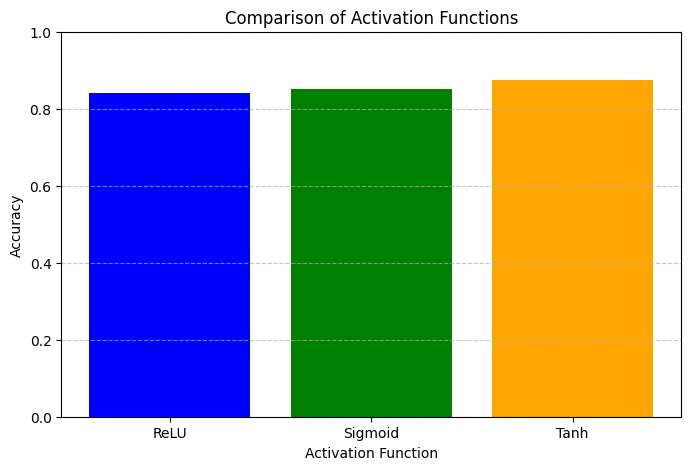

In [ ]:
import matplotlib.pyplot as plt

# Lista de nombres de funciones de activación
activations = ['ReLU', 'Sigmoid', 'Tanh']

# Lista de precisiones obtenidas por cada modelo
accuracies = [relu_acc, sigmoid_acc, tanh_acc]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(activations, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Comparison of Activation Functions')
plt.ylim(0, 1)  # Establecer límites en el eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Mejora de nuestra red MNIST

**Actualicemos la red MNIST para reflejar lo que has aprendido.**

Teóricamente, la función tanh debería mejorar la activación de la capa oculta, y softmax debería mejorar la función de activación de la capa de salida. Cuando las probamos, de hecho alcanzan una puntuación más alta. Pero las cosas no siempre son tan sencillas como parecen.

Tuve que hacer un par de ajustes para afinar la red adecuadamente con estas nuevas activaciones. Para $tanh$, tuve que reducir la desviación estándar de los pesos entrantes. Recuerda que inicializas los pesos aleatoriamente. np.random.random crea una matriz aleatoria con números repartidos aleatoriamente entre 0 y 1. Multiplicando por 0.2 y restando por 0.1, reescalas este rango aleatorio para que esté entre -0.1 y 0.1. Esto funcionó muy bien para relu pero es menos óptimo para tanh. a tanh le gusta tener una inicialización aleatoria más estrecha, así que la ajusté para que estuviera entre -0.01 y 0.01.

También he eliminado el cálculo de error. Técnicamente, softmax se utiliza mejor con una función de error llamada entropía cruzada. Esta red calcula correctamente layer_2_delta para esta medida de error, pero como no hemos analizado por qué esta función de error es ventajosa, he eliminado las líneas para calcularla.

Por último, como con casi todos los cambios realizados en una red neuronal, tuve que revisar el ajuste de alfa. Descubrí que se necesitaba un alfa mucho más alto para alcanzar una buena puntuación en 300 iteraciones. Y ¡voilá! Como era de esperar, la red alcanzó una mayor precisión en las pruebas, del 87%.


In [ ]:
import numpy as np, sys
np.random.seed(1)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_1_2))

        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

        layer_2_delta = (labels[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))

11490434/11490434 [==============================] - 0s 0us/step

I:0 Test-Acc:0.394 Train-Acc:0.156
I:10 Test-Acc:0.6867 Train-Acc:0.723
I:20 Test-Acc:0.7025 Train-Acc:0.732
I:30 Test-Acc:0.734 Train-Acc:0.763
I:40 Test-Acc:0.7663 Train-Acc:0.794
I:50 Test-Acc:0.7913 Train-Acc:0.819
I:60 Test-Acc:0.8102 Train-Acc:0.849
I:70 Test-Acc:0.8228 Train-Acc:0.864
I:80 Test-Acc:0.831 Train-Acc:0.867
I:90 Test-Acc:0.8364 Train-Acc:0.885
I:100 Test-Acc:0.8407 Train-Acc:0.883
I:110 Test-Acc:0.845 Train-Acc:0.891
I:120 Test-Acc:0.8481 Train-Acc:0.901
I:130 Test-Acc:0.8505 Train-Acc:0.901
I:140 Test-Acc:0.8526 Train-Acc:0.905
I:150 Test-Acc:0.8555 Train-Acc:0.914
I:160 Test-Acc:0.8577 Train-Acc:0.925
I:170 Test-Acc:0.8596 Train-Acc:0.918
I:180 Test-Acc:0.8619 Train-Acc:0.933
I:190 Test-Acc:0.863 Train-Acc:0.933
I:200 Test-Acc:0.8642 Train-Acc:0.926
I:210 Test-Acc:0.8653 Train-Acc:0.931
I:220 Test-Acc:0.8668 Train-Acc:0.93
I:230 Test-Acc:0.8672 Train-Acc:0.937
I:240 Test-Acc:0.8681 Train-Acc:0.938
I

# Mejora de nuestra red MNIST

**Reutilización de pesos en varios lugares**

Si necesita detectar la misma característica en varios lugares utilice las mismas ponderaciones.

El mayor reto de las redes neuronales es el de la sobreadaptación, cuando una red neuronal memoriza un conjunto de datos en lugar de aprender abstracciones útiles que generalicen a datos no vistos. En otras palabras, la red neuronal aprende a predecir basándose en el ruido del conjunto de datos en lugar de basarse en la señal fundamental (¿recuerdas la analogía sobre un tenedor incrustado en arcilla?).

El sobreajuste suele deberse a que se dispone de más parámetros de los necesarios para aprender un conjunto de datos específico. En este caso, la red tiene tantos parámetros que puede memorizar todos los detalles del conjunto de datos de entrenamiento, en lugar de aprender abstracciones de alto nivel. Cuando las redes neuronales tienen muchos parámetros pero pocos ejemplos de entrenamiento, es difícil evitar el sobreajuste.)

**La capa convolucional**

Muchas capas lineales muy pequeñas se reutilizan en cada posición,
en lugar de una única capa grande. La idea central de una capa convolucional es que, en lugar de tener una capa lineal grande y densa con una conexión desde cada entrada hasta cada salida, se tienen muchas capas lineales muy pequeñas, normalmente con menos de 25 entradas y una única salida, que se utilizan en cada posición de entrada. Cada minicapa se denomina núcleo convolucional, pero en realidad no es más que una pequeña capa lineal con un pequeño número de entradas y una única salida.


# Implementación en NUMPY

In [ ]:
import numpy as np, sys
np.random.seed(1)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255,
                  y_train[0:1000])


one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations = (2, 300)
pixels_per_image, num_labels = (784, 10)
batch_size = 128

input_rows = 28
input_cols = 28

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

hidden_size = ((input_rows - kernel_rows) *
               (input_cols - kernel_cols)) * num_kernels

# weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
kernels = 0.02*np.random.random((kernel_rows*kernel_cols,
                                 num_kernels))-0.01

weights_1_2 = 0.2*np.random.random((hidden_size,
                                    num_labels)) - 0.1



def get_image_section(layer,row_from, row_to, col_from, col_to):
    section = layer[:,row_from:row_to,col_from:col_to]
    return section.reshape(-1,1,row_to-row_from, col_to-col_from)

for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
        layer_0.shape

        sects = list()
        for row_start in range(layer_0.shape[1]-kernel_rows):
            for col_start in range(layer_0.shape[2] - kernel_cols):
                sect = get_image_section(layer_0,
                                         row_start,
                                         row_start+kernel_rows,
                                         col_start,
                                         col_start+kernel_cols)
                sects.append(sect)

        expanded_input = np.concatenate(sects,axis=1)
        es = expanded_input.shape
        flattened_input = expanded_input.reshape(es[0]*es[1],-1)

        kernel_output = flattened_input.dot(kernels)
        layer_1 = tanh(kernel_output.reshape(es[0],-1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_1_2))

        for k in range(batch_size):
            labelset = labels[batch_start+k:batch_start+k+1]
            _inc = int(np.argmax(layer_2[k:k+1]) ==
                               np.argmax(labelset))
            correct_cnt += _inc

        layer_2_delta = (labels[batch_start:batch_end]-layer_2)\
                        / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * \
                        tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        l1d_reshape = layer_1_delta.reshape(kernel_output.shape)
        k_update = flattened_input.T.dot(l1d_reshape)
        kernels -= alpha * k_update

    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
#         layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
        layer_0.shape

        sects = list()
        for row_start in range(layer_0.shape[1]-kernel_rows):
            for col_start in range(layer_0.shape[2] - kernel_cols):
                sect = get_image_section(layer_0,
                                         row_start,
                                         row_start+kernel_rows,
                                         col_start,
                                         col_start+kernel_cols)
                sects.append(sect)

        expanded_input = np.concatenate(sects,axis=1)
        es = expanded_input.shape
        flattened_input = expanded_input.reshape(es[0]*es[1],-1)

        kernel_output = flattened_input.dot(kernels)
        layer_1 = tanh(kernel_output.reshape(es[0],-1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_correct_cnt += int(np.argmax(layer_2) ==
                                np.argmax(test_labels[i:i+1]))
    if(j % 1 == 0):
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.0288 Train-Acc:0.055
I:1 Test-Acc:0.0273 Train-Acc:0.037
I:2 Test-Acc:0.028 Train-Acc:0.037
I:3 Test-Acc:0.0292 Train-Acc:0.04
I:4 Test-Acc:0.0339 Train-Acc:0.046
I:5 Test-Acc:0.0478 Train-Acc:0.068

KeyboardInterrupt: 

Como puedes ver, cambiar la primera capa de la red por una capa convolucional da otros pocos puntos porcentuales en la reducción de errores. La salida de la capa convolucional (kernel_output) es a su vez una serie de imágenes bidimensionales (la salida de cada kernel en cada posición de entrada).

La mayoría de los usos de las capas convolucionales apilan varias capas unas sobre otras, de forma que cada capa convolucional trata la anterior como una imagen de entrada. (Siéntete libre de hacer esto como proyecto personal; aumentará aún más la precisión).

Las capas convolucionales apiladas son uno de los principales avances que permitieron crear redes neuronales muy profundas (y, por extensión, la popularización de la expresión aprendizaje profundo). Nunca se insistirá lo suficiente en que este invento marcó un hito en este campo; sin él, es posible que aún estuviéramos en el anterior invierno de la IA, incluso en el momento de escribir estas líneas.
